20.489548613786845
done


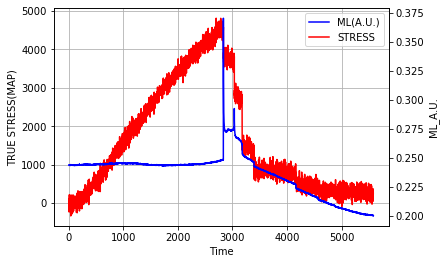

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import pandas as pd
import fracture

#csv파일 형식 바꾸기!

"""setting values"""
path = 'E:\experiment data\\aluminum\\2021-01-27\\0.05mmsec_125f_epoxy_dic\\img'
path_save= 'E:\experiment data\\aluminum\\2021-01-27\\0.05mmsec_125f_epoxy_dic\\img\\A'

#part2 , location must be x1<x2, y1<y2

slice_x1 = 419
slice_x2 = 486
slice_y1 = 343
slice_y2 = 413

file_list = os.listdir(path)
count = 0
result = []

for file in file_list:
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)/255
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]
        ave = np.average(img_box)
        result = np.append(result, [ave])

print("done")


ml_avg = result
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 0], tension_data[:, 4], tension_data[:, 3]*3000

#graph part
##############

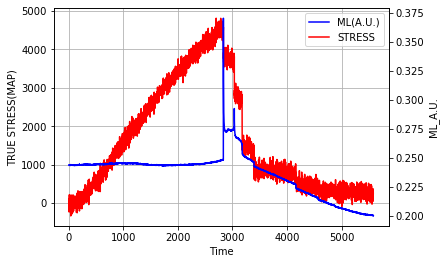

In [21]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.set_xlabel('Time')
ax1.set_ylabel('ML_A.U.')
ax.set_ylabel('TRUE STRESS(MAP)')
line1 = ax1.plot(time, ml_avg, color='b', label="ML(A.U.)")
line2 = ax.plot(time, stress, color='r', label="STRESS")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)
# ax.set_xlim(0,2830)
# ax1.set_ylim(0.24,0.250)
ax.grid()
plt.show()
fig.savefig(path_save+'/graph.png', dpi = 1000)

In [2]:
import cv2
im = cv2.imread(os.path.join(path, 'a000001.jpg'), cv2.IMREAD_GRAYSCALE)
start_point = (slice_x1, slice_y1)
end_point = (slice_x2, slice_y2)
# Blue color in BGR
color = (0 , 0, 255)
# Line thickness of 2 px
thickness = 10

# Using cv2.rectangle() method
image = cv2.rectangle(im, start_point, end_point,color, thickness)
# Draw a rectangle with blue line borders of thickness of 2 px

# Displaying the image
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\highgui\src\window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


3 gas 23 dst


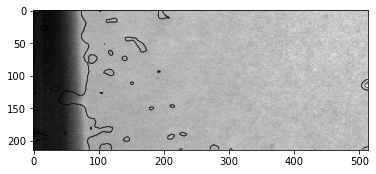

In [174]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
from scipy.spatial.distance import cdist

path = 'E:\experiment data\\aluminum\\2021-01-18\\acri_0.05mm_nofilter\img'
save_path = os.path.join(path, "a")
img = glob.glob(path+'/f*.jpg')
if not img:
    print("Image read false!")
    sys.exit()

num=1000
count = 1

src_ = cv2.imread(img[num], cv2.IMREAD_GRAYSCALE)[397:611,:514]
src1 = src_.copy()
src_0 = cv2.imread(img[750], cv2.IMREAD_GRAYSCALE)[397:611,:514]
dst = cv2.subtract(src_, src_0)
"""표준편차 양 바꾸면서 그래프 그리기 3*3갯수로 만들기"""

# fig, ax = plt.subplots(3,3, figsize=(15,15))
# for i in range(0,3):
#     for j in range(0,3):
#         gas_sigma = i*10+j*5+1
#         gas = cv2.GaussianBlur(dst,(0,0), gas_sigma)
#         ax[i][j].imshow(src1,cmap='gray')
#         cs = ax[i][j].contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
#         ax[i][j].set_title(str(gas_sigma)+'gas sigma, level max'+str(int(np.max(gas))))

gas = cv2.GaussianBlur(dst,(0,0), 5)
plt.imshow(src1,cmap='gray')
# cs = plt.contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
cs = plt.contour(gas, 4,  colors='black', linewidths = 0.5)
plt.savefig(save_path+'/%d.png'%num)
print(gas.max(),'gas', dst.max(),'dst')
count += 1

plt.show()

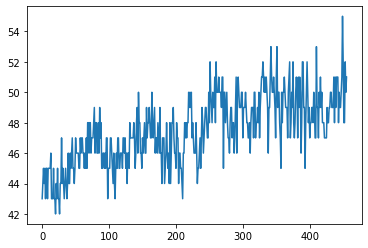

In [155]:
x = src_0[498,80:536]
plt.plot(x)